In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from jax import jit
import jaxquantum as jqt 
import jax.numpy as jnp
import matplotlib.pyplot as plt

N = 100

omega_a = 2.0*jnp.pi*5.0
kappa = 2*jnp.pi*jnp.array([1,2]) # Batching to explore two different kappa values!
initial_state = jqt.displace(N, 0.1) @ jqt.basis(N,0)
initial_state_dm = initial_state.to_dm()
ts = jnp.linspace(0, 4*2*jnp.pi/omega_a, 101)

a = jqt.destroy(N)
n = a.dag() @ a

c_ops = jqt.Qarray.from_list([jnp.sqrt(kappa)*a])

@jit
def Ht(t):
    H0 = omega_a*n
    return H0

solver_options = jqt.SolverOptions.create(progress_meter=True)
states = jqt.mesolve(Ht, initial_state_dm, ts, c_ops=c_ops, solver_options=solver_options) 
nt = jnp.real(jqt.overlap(n, states))
a_real = jnp.real(jqt.overlap(a, states))
a_imag = jnp.imag(jqt.overlap(a, states))

fig, axs = plt.subplots(2,1, dpi=200, figsize=(6,5))
ax = axs[0]
ax.plot(ts, a_real[:,0], label=r"$Re[\langle a(t)\rangle]$", color="blue") # Batch kappa value 0
ax.plot(ts, a_real[:,1], "--", label=r"$Re[\langle a(t)\rangle]$", color="blue") # Batch kappa value 1
ax.plot(ts, a_imag[:,0], label=r"$Re[\langle a(t)\rangle]$", color="red") # Batch kappa value 0
ax.plot(ts, a_imag[:,1], "--", label=r"$Re[\langle a(t)\rangle]$", color="red") # Batch kappa value 1
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectations")
ax.legend()

ax = axs[1]
ax.plot(ts, nt[:,0], label=r"$Re[\langle n(t)\rangle]$", color="green") # Batch kappa value 0
ax.plot(ts, nt[:,1], "--", label=r"$Re[\langle n(t)\rangle]$", color="green") # Batch kappa value 1
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectations")
ax.legend()
fig.tight_layout()

### Lossy Harmonic Oscillator

In [3]:
from jax import jit
import jaxquantum as jqt 
import jax.numpy as jnp
import matplotlib.pyplot as plt

N = 100

omega_a = 2.0*jnp.pi*5.0
kappa = 2*jnp.pi*jnp.array([1,2]) # Batching to explore two different kappa values!
initial_state = jqt.displace(N, 0.1) @ jqt.basis(N,0)
initial_state_dm = initial_state.to_dm()
ts = jnp.linspace(0, 4*2*jnp.pi/omega_a, 101)

a = jqt.destroy(N)
n = a.dag() @ a

c_ops = jqt.Qarray.from_list([jnp.sqrt(kappa)*a])

@jit
def Ht(t):
    H0 = omega_a*n
    return H0

solver_options = jqt.SolverOptions.create(progress_meter=True)

states = jqt.mesolve(Ht, initial_state_dm, ts, c_ops=c_ops, solver_options=solver_options) 
# nt = jnp.real(jqt.calc_expect(n, states))
# a_real = jnp.real(jqt.calc_expect(a, states))
# a_imag = jnp.imag(jqt.calc_expect(a, states))

# fig, axs = plt.subplots(2,1, dpi=200, figsize=(6,5))
# ax = axs[0]
# ax.plot(ts, a_real[:,0], label=r"$Re[\langle a(t)\rangle]$", color="blue") # Batch kappa value 0
# ax.plot(ts, a_real[:,1], "--", label=r"$Re[\langle a(t)\rangle]$", color="blue") # Batch kappa value 1
# ax.plot(ts, a_imag[:,0], label=r"$Re[\langle a(t)\rangle]$", color="red") # Batch kappa value 0
# ax.plot(ts, a_imag[:,1], "--", label=r"$Re[\langle a(t)\rangle]$", color="red") # Batch kappa value 1
# ax.set_xlabel("Time (ns)")
# ax.set_ylabel("Expectations")
# ax.legend()

# ax = axs[1]
# ax.plot(ts, nt[:,0], label=r"$Re[\langle n(t)\rangle]$", color="green") # Batch kappa value 0
# ax.plot(ts, nt[:,1], "--", label=r"$Re[\langle n(t)\rangle]$", color="green") # Batch kappa value 1
# ax.set_xlabel("Time (ns)")
# ax.set_ylabel("Expectations")
# ax.legend()
# fig.tight_layout()

ValueError: Terms are not compatible with solver!

In [ ]:
# jqt.Qarray.from_list([jqt.displace(10,jnp.array([0.1,0.2]))])
# jqt.Qarray.from_list([jqt.displace(10,0.1)])
# jqt.Qarray.from_list([])
# jqt.Qarray.from_list([jqt.displace(10,jnp.array([[0.1],[0.2]]))])

Quantum array: dims = ((10,), (10,)), bdims = (1, 2, 1), shape = (1, 2, 1, 10, 10), type = oper
Qarray data =
[[[[[ 9.95012479e-01+0.j -9.95012479e-02+0.j  7.03580071e-03+0.j
     -4.06212144e-04+0.j  2.03106072e-05+0.j -9.08317966e-07+0.j
      3.70819257e-08+0.j -1.40156505e-09+0.j  4.95527700e-11+0.j
     -1.65326214e-12+0.j]
    [ 9.95012479e-02+0.j  9.85062354e-01+0.j -1.40012434e-01+0.j
      1.21457431e-02+0.j -8.10393227e-04+0.j  4.53250665e-05+0.j
     -2.22120735e-06+0.j  9.79693971e-08+0.j -3.95926482e-09+0.j
      1.48658310e-10+0.j]
    [ 7.03580071e-03+0.j  1.40012434e-01+0.j  9.75161980e-01+0.j
     -1.70620677e-01+0.j  1.71193712e-02+0.j -1.27813923e-03+0.j
      7.83482550e-05+0.j -4.14857097e-06+0.j  1.95658481e-07+0.j
     -8.40003804e-09+0.j]
    [ 4.06212144e-04+0.j  1.21457431e-02+0.j  1.70620677e-01+0.j
      9.65311191e-01+0.j -1.96027400e-01+0.j  2.20272197e-02+0.j
     -1.80303840e-03+0.j  1.19439419e-04+0.j -6.76327146e-06+0.j
      3.39011810e-07+0.j]
    [ 

### Sideband cooling qubit

In [1]:
# N = 100

# omega_a = 2.0*jnp.pi*5.0
# g = 2*jnp.pi*0.1
# kappa = 2*jnp.pi*1

# initial_state = jqt.displace(N, 0.1) @ jqt.basis(N,0)
# initial_state_dm = initial_state.to_dm()
# ts = jnp.linspace(0, 4*2*jnp.pi/omega_a, 101)

# a = jqt.destroy(N)
# n = a.dag() @ a

# c_ops = [a*jnp.sqrt(kappa)]

# @jit
# def Ht(t):
#     H0 = omega_a*n
#     return H0

# solver_options = jqt.SolverOptions.create(progress_meter=True)
# states = jqt.mesolve(initial_state_dm, ts, c_ops=c_ops, Ht=Ht, solver_options=solver_options) 
# nt = jnp.real(jqt.calc_expect(n, states))
# a_real = jnp.real(jqt.calc_expect(a, states))
# a_imag = jnp.imag(jqt.calc_expect(a, states))

# fig, axs = plt.subplots(2,1, dpi=200, figsize=(6,5))
# ax = axs[0]
# ax.plot(ts, a_real, label=r"$Re[\langle a(t)\rangle]$")
# ax.plot(ts, a_imag, label=r"$Re[\langle a(t)\rangle]$")
# ax.set_xlabel("Time (ns)")
# ax.set_ylabel("Expectations")
# ax.legend()

# ax = axs[1]
# ax.plot(ts, nt, label=r"$Re[\langle n(t)\rangle]$")
# ax.set_xlabel("Time (ns)")
# ax.set_ylabel("Expectations")
# ax.legend()
# fig.tight_layout()

# sesolve

100% |██████████| [00:00<00:00, 1467.74%/s]


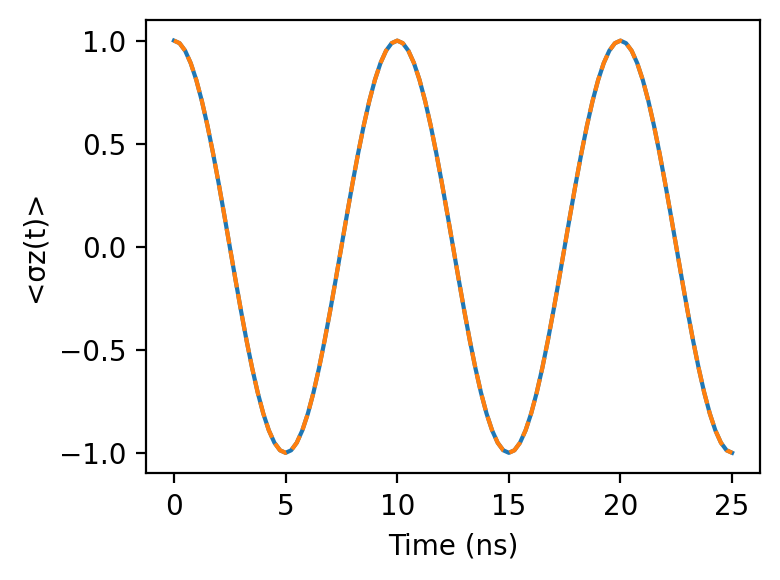

In [14]:
omega_q = 2*jnp.pi*5.0 #GHzz
Omega = 2*jnp.pi*.1
g_state = jqt.basis(2,0) ^ jqt.basis(2,0)
g_state_dm = g_state.to_dm()

ts = jnp.linspace(0,5*jnp.pi/Omega,101)

sz0 = jqt.sigmaz() ^ jqt.identity(N=2)

@jit
def Ht(t):
    H0 = omega_q/2.0*((jqt.sigmaz()^jqt.identity(N=2)) + (jqt.identity(N=2)^jqt.sigmaz()))
    H1 = Omega*jnp.cos((omega_q)*t)*((jqt.sigmax()^jqt.identity(N=2)) + (jqt.identity(N=2)^jqt.sigmax()))
    return H0 + H1

states = jqt.sesolve(Ht, g_state, ts) 
szt = jnp.real(jqt.overlap(states, sz0))

fig, ax = plt.subplots(1, dpi=200, figsize=(4,3))
ax.plot(ts, szt)
ax.plot(ts, jnp.cos(Omega*ts), "--", label=r"$\cos(\Omega t)$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("<σz(t)>")
fig.tight_layout()

100% |██████████| [00:00<00:00, 1331.86%/s]


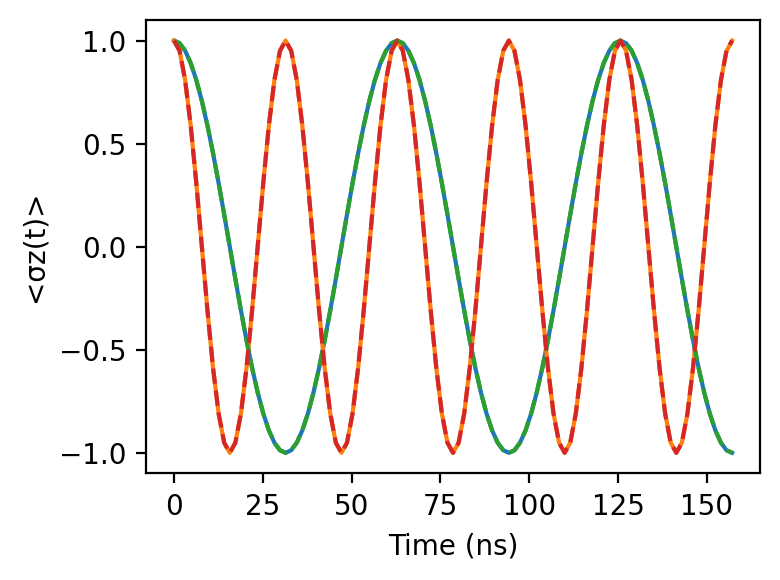

In [21]:
omega_q = 5.0 #GHzz
Omega = jnp.array([.1,.2])
g_state = jqt.basis(2,0) ^ jqt.basis(2,0)
g_state_dm = g_state.to_dm()

ts = jnp.linspace(0,5*jnp.pi/Omega[0],101)

sz0 = jqt.sigmaz() ^ jqt.identity(N=2)

@jit
def Ht(t):
    H0 = omega_q/2.0*((jqt.sigmaz()^jqt.identity(N=2)) + (jqt.identity(N=2)^jqt.sigmaz()))
    H1 = Omega*jnp.cos((omega_q)*t)*((jqt.sigmax()^jqt.identity(N=2)) + (jqt.identity(N=2)^jqt.sigmax()))
    return H0 + H1

states = jqt.sesolve(Ht, g_state, ts) 
szt = jnp.real(jqt.overlap(states, sz0))

fig, ax = plt.subplots(1, dpi=200, figsize=(4,3))
ax.plot(ts, szt[:,0])
ax.plot(ts, szt[:,1])
ax.plot(ts, jnp.cos(Omega[0]*ts), "--", label=r"$\cos(\Omega_0 t)$")
ax.plot(ts, jnp.cos(Omega[1]*ts), "--", label=r"$\cos(\Omega_1 t)$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("<σz(t)>")
fig.tight_layout()

for j in range(2):
    test_time = ts[34]
    sim_szt =  szt[34,j]
    cal_szt = jnp.cos(Omega[j]*test_time)
    assert jnp.isclose(sim_szt, cal_szt, atol=1e-3), f"Expected {cal_szt}, got {sim_szt}"

100% |██████████| [00:00<00:00, 55924.05%/s]


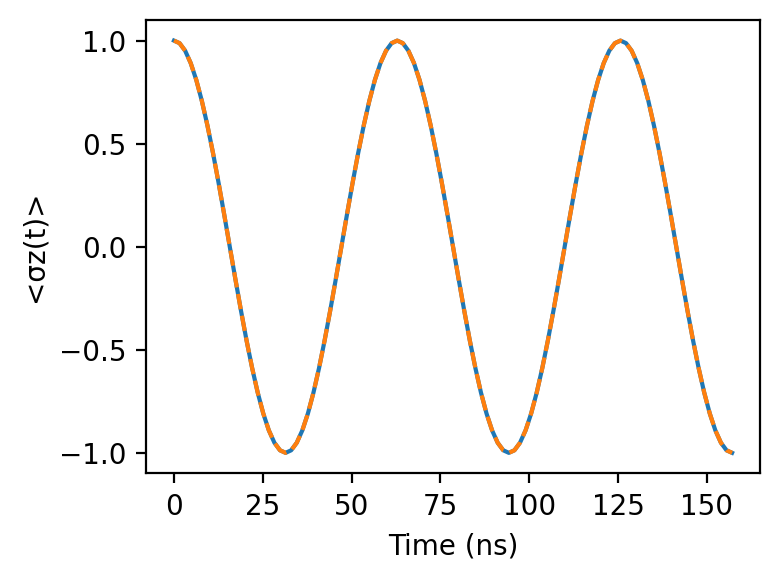

In [26]:
omega_q = 5.0 #GHzz
Omega = .1
g_state = jqt.basis(2,0) ^ jqt.basis(2,0)
ts = jnp.linspace(0,5*jnp.pi/Omega,101)
sz0 = jqt.sigmaz() ^ jqt.identity(N=2)
H0 = Omega/2*jqt.sigmax() ^ jqt.identity(N=2)
states = jqt.sesolve(H0, g_state, ts)

szt = jnp.real(jqt.overlap(states, sz0))

fig, ax = plt.subplots(1, dpi=200, figsize=(4,3))
ax.plot(ts, szt)
ax.plot(ts, jnp.cos(Omega*ts), "--", label=r"$\cos(\Omega t)$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("<σz(t)>")
fig.tight_layout()

In [35]:
omega_q = 5.0 #GHzz
Omega = .1
g_state = jqt.basis(2,0) ^ jqt.basis(2,0)
ts = jnp.linspace(0,5*jnp.pi/Omega,101)
sz0 = jqt.sigmaz() ^ jqt.identity(N=2)
H0 = Omega/2*jqt.sigmax() ^ jqt.identity(N=2)
states = jqt.sesolve(H0, g_state, ts)

szt = jnp.real(jqt.overlap(states, sz0))

test_time = ts[50]
test_szt = szt[50]
cal_szt = jnp.cos(Omega*test_time)
assert jnp.isclose(test_szt, cal_szt, atol=1e-5)

100% |██████████| [00:00<00:00, 52606.35%/s]


In [38]:
omega_q = 5.0 #GHzz
Omega = .1
g_state = jqt.basis(2,0) ^ jqt.basis(2,0)
ts = jnp.linspace(0,5*jnp.pi/Omega,101)
sz0 = jqt.sigmaz() ^ jqt.identity(N=2)
H0 = Omega/2*jqt.sigmax() ^ jqt.identity(N=2)
c_ops = jqt.Qarray.from_list([])
states = jqt.mesolve(H0, g_state, ts, c_ops=c_ops)

szt = jnp.real(jqt.overlap(states, sz0))

test_time = ts[50]
test_szt = szt[50]
cal_szt = jnp.cos(Omega*test_time)
assert jnp.isclose(test_szt, cal_szt, atol=1e-5)

100% |██████████| [00:00<00:00, 41859.32%/s]


Array(0.30060961+0.j, dtype=complex128)

In [50]:
jqt.thermal(10,jnp.inf) == jqt.basis(10,0)

Array(True, dtype=bool)

In [48]:
jnp.abs(jqt.thermal(10,0.1).data[2,2] - jnp.exp(-0.1*2)) < 1e-7

Array(False, dtype=bool)